# Final Project: Predicting Performance of Stocks in the Dow Jones Index

Jul 24 2022 Session A6 

By: Laura Lu 

## I. Introduction

People are becoming increasingly interested in stocks as demonstrated by the rise in total market capitalization from US 2.5 trillion in 1980 to US 93.8 trillion in 2020. Preferred stocks can return payment dividends to its stakeholders. On the contrary, the value of the stock may fall and stakeholders will end up facing a loss in investment rather than a gain. Each day, the stakeholder tries to make a decision about whether it should buy or sell depending on their understand of various external and internal factors that may affect a stock's performance the next day. 

Indexes are helpful indicators of market sentiment. Indexes provide a measurable number that represents the market or a selected group of stocks. One of the most popular indexes is the Dow Jones Index which is an indicator of some of America's largest 30 companies from a variety of industries. The index initially was calculated by averaging the sum of all the prices inside the index. Since then, the calculation have become more advanced to consider pre defined weighted averages. But the idea still holds: a number is used to help stakeholders predict the performance of a stock. Trying to define a more accurate number has become a popular topic of research, especially in the machine learning field. Many scientists are trying to investigate algorithms that can best predict the performance of a stock a day, a week or a month from now for example. 

We are interested in the stock that will produce the greatest rate of return in the following week. Thus, we will compare the accuracy of rate of return prediction across three different algorithms: linear regression, random forest and clustering. We will test and train these algorithms using the Dow Jones Index data set from the UCI Machine Learning Respository. 

This report is divided into the following sections: 

I. Introduction <br>
II. Clustering <br>
III. Random Forest  <br>
IV. Linear Regression <br>
V. Conclusion <br>

Each section is dedicated to exploring one algorithm. Each algorithmic section will contain a literature review and critique of relevant papers. Then, we will test and train the data set using the related algorithm that we learned in class. We will cross validate to optimize the hyperparameters such as the number of clusters and the maximum depth for a tree. We will also critique our algorithm and any biases and limitations that may exist. Finally, we will compare the results of our algorithm with the results of the algorithm used in the paper.

## II. Importing the Data

The Dow Jones data set was taken from UCI Machine Learning Repository. As the documentation states, a six-month range of weekly samples from Jan to June 2011 are given, each containing 16 feature values: open, high, low, close, volume, percent change price, percent change volume over last week, previous weeks volume, next weeks open, next weeks close, percent change next weeks price, days to next dividend and percent return next dividend.  The size of the imported data matches with the expected 750 x 16 dataset, the first and last several rows have values with reasonable ranges. The data set is divided into two quarters. The first quarter is intended to be used as the training data and the second quarter is intended to be used as the testing data. We will be following this data division with relevant algorithms that require training and testing data.


In [354]:
import pandas as pd
df = pd.read_csv('dow.data')

In [355]:
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


The independent variable is the date. Thus, we will set x to be a dataframe that holds all the date values. The size of the dataframe matches with the dataset as it is 750 x 1. 

In [359]:
x = df [['date']]
print (x)

          date
0     1/7/2011
1    1/14/2011
2    1/21/2011
3    1/28/2011
4     2/4/2011
..         ...
745  5/27/2011
746   6/3/2011
747  6/10/2011
748  6/17/2011
749  6/24/2011

[750 rows x 1 columns]


We are interested in exploring how price changes from one week to the next. Thus, the dependent variable on date is the percent change from this week's price to next week's price. Just like how we processed x, we will set y to be a dataframe that holds all the percent cahnge values. The size of the data matches with the dataset as it is also 750 x 1.

In [360]:
y = df[['percent_change_next_weeks_price']] 
print (y)

     percent_change_next_weeks_price
0                          -4.428490
1                          -2.470660
2                           1.638310
3                           5.933250
4                           0.230814
..                               ...
745                        -2.521610
746                        -1.420980
747                        -1.225000
748                        -2.377620
749                         6.672740

[750 rows x 1 columns]


## III. Clustering

### Literature Review

#### Citation 

Brown, M. S., Pelosi, M. J., & Dirska, H. (2013, July). Dynamic-radius species-conserving genetic algorithm for the financial forecasting of Dow Jones index stocks. In International Workshop on Machine Learning and Data Mining in Pattern Recognition (pp. 27-41). Springer, Berlin, Heidelberg

#### Summary 

In this paper, they present a new way of financially forecasting stock values that diverges from the typical Genetic Algorithm (GA). Genetic Algorithms (GA) find the local optimum point in a set of data and continuously select the point that performs the strongest. Genetic Algorithms will search for optimal rules that are then applied to each stock to classify them into groups of buy and sell. Genetic Algorithms have typically only predicted stock performance correctly 45% of the time. 

In contrast, Brown, Pelosi and Dirska use a Niche Genetic Algorithm, called the Dynamic Radius Species Conserving Genetic Algorithm (DSGA), that finds multiple optimum points in the data rather than one. The DSGA examines only four stock characteristics to make decisions: change in stock price, cahnge in stock volume, days until the next dividend and return of next dividend. The DSGA will form clusters of individuals that are within a predetermined radius. The algorithm moves the strongest member of a cluster of individuals within a certain radius to the next generation. The strongest member is selected by choosing the seed or the stock that has the highest fitness score using the scientist's fitness functions. The strongest seed will then replace the weakest individual within the predefined radius, thus, creating a new generation. Future generations are intended to explore other areas of the dataset that haven't already been touched. Furthermore, to minimize poor radius choices, the DSGA varies the size of the radius every fixed number of runs. 

#### Key Findings

The rate of return was used to evaluate the usefulness of the algorithm. The rate of return is calculated by summing the weekly return and dividing by the initial investment amount in the beginning of the week. The initial investment amount in the beginning of the week is constant across all the weeks. The Dow Jones Index, which in this paper is defined as the rate of return by investing an equal amount of money in the 30 stocks, produced a 0.13% weekly rate of return. The DSGA produced a 0.54% weekly rate of return. All 1 week trials outperformed the Dow Jones Index. 

#### Limitations, Biases and Shortcomings

This paper predicts short-term 1 week stock movement. But there are differences in how someone would invest within a one week time frame, one month time frame or one year time frame. For example, the Apple Stock could have a higher rate of return compared to the Home Depot stock within the first week of May. If you were only able to afford purchasing a stock at one of these companies, the algorithm would then advise you to hold onto the Apple Stock and sell Home Depot. However, it is possible that Home Depot would have a higher monthly rate of return than the Apple stock. In this case, you would have suffered greater loss from buying the Apple stock than the Home Depot stock in the long run. The timeframe that someone chooses to evaluate the rate of return can greatly vary depending on their investment mindset. Thus, this paper should explicitly state that this predictive model is suitable for an investment type suitable to day-traders and should make no claims towards their predictions effectively guide the behavior of more retirement- and pension-minded investors.

This clarification is especially important because the Dow Jones Index minimizes the losses of an inaccurate prediction. However, this algorithm makes decisions using 4 factors which at times can generate higher reward than the Dow, but a wrong prediction can also generate greater losses than the Dow. A loss can have arguably have a more profound impact on the stakeholder than a gain. These losses and risks should be more explicit in the paper to give risk averse investors forewarning to the consequences of following this algorithm's predictions.

### Dataset Processing

The Machine Learning and Data Mining in Pattern Recognition paper uses the Dynamic Radius Species Conserving Genetic Algorithm, a kind of clustering algorithm. Since we haven't learned this in class, we can try to reproduce the results using clustering. They developed rules from the dataset to assign an indicator to each stock per week. The stock with a higher indicator would be selected. However, if two stocks have the same indicator then they choose the stock with the greatest price percent gain. Since we aren't able to assign indicators to the dataset, we can reproduce the results by measuring the price percent change between the current week and the next week. Specifically, we will be measuring the feature "percent_change_next_weeks_price".  

In [346]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

We create an array of hex codes of different colours that we will later use to differentiate clusters. 

In [347]:
ourcolors = ['#f0787e', '#f5a841', '#5ac5bc', '#ee65a3', '#f5e34b', '#640587', '#c2c36d',
  '#2e003a', '#878587', '#d3abea', '#f2a227', '#f0db08', '#148503', '#0a6940',
  '#043834', '#726edb', '#db6e6e', '#db6ecb', '#6edb91']

#### Determining the Optimal Number of Clusters

The inertia of a clustering algorithm measures how well a dataset is clustered by kmeans. It is calculated by finding the distance between each point in the cluster and the cluster's centroid, squaring these distances and summing them together. The inertia of a clustering algorithm is similar to the the shape of a negative exponent function where the difference in inertia will taper off after a certain number of clusters. We will test with different number of clusters to determine the optimal number of clusters to use by measuring the inertia for each cluster option.

##### 10 Clusters

In [348]:
kmeans = KMeans(n_clusters=10)

In [349]:
kmeans.fit(x)

KMeans(n_clusters=10)

In [350]:
kmeans.labels_

array([5, 0, 7, 2, 1, 1, 8, 8, 0, 7, 6, 7, 6, 1, 5, 1, 2, 8, 0, 1, 1, 1,
       7, 1, 1, 7, 0, 6, 1, 1, 1, 1, 1, 0, 6, 1, 2, 5, 5, 6, 7, 1, 8, 8,
       7, 8, 5, 1, 1, 8, 6, 6, 6, 3, 0, 1, 0, 3, 3, 6, 7, 0, 1, 2, 4, 1,
       1, 8, 0, 0, 1, 8, 3, 1, 1, 6, 1, 6, 3, 7, 5, 6, 3, 7, 6, 0, 6, 6,
       6, 3, 8, 1, 0, 1, 1, 7, 1, 7, 8, 6, 2, 1, 1, 7, 8, 0, 6, 1, 7, 6,
       7, 3, 3, 1, 1, 0, 1, 0, 1, 3, 2, 7, 1, 1, 7, 3, 5, 1, 1, 0, 6, 1,
       6, 3, 0, 6, 7, 1, 9, 8, 0, 1, 7, 0, 3, 6, 3, 6, 1, 1, 1, 1, 1, 0,
       3, 7, 7, 1, 3, 1, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 5, 7, 1, 1, 8, 7,
       0, 8, 1, 1, 6, 1, 8, 1, 6, 6, 8, 0, 1, 1, 1, 1, 7, 1, 0, 3, 8, 1,
       6, 1, 1, 8, 7, 1, 1, 1, 8, 1, 7, 7, 7, 7, 1, 0, 6, 6, 1, 1, 8, 1,
       3, 1, 8, 3, 1, 5, 3, 1, 3, 7, 8, 1, 6, 7, 0, 1, 8, 0, 3, 1, 9, 1,
       0, 8, 1, 1, 8, 3, 1, 8, 7, 7, 1, 1, 1, 1, 8, 1, 1, 0, 8, 0, 7, 1,
       1, 1, 1, 2, 0, 7, 1, 6, 1, 6, 1, 1, 7, 1, 0, 8, 7, 1, 8, 8, 1, 1,
       1, 7, 1, 1, 0, 3, 7, 1, 1, 8, 7, 8, 1, 2, 3,

In [351]:
x.iloc[0]

percent_change_next_weeks_price   -4
Name: 0, dtype: int64

In [352]:
kmeans.predict(x)

array([5, 0, 7, 2, 1, 1, 8, 8, 0, 7, 6, 7, 6, 1, 5, 1, 2, 8, 0, 1, 1, 1,
       7, 1, 1, 7, 0, 6, 1, 1, 1, 1, 1, 0, 6, 1, 2, 5, 5, 6, 7, 1, 8, 8,
       7, 8, 5, 1, 1, 8, 6, 6, 6, 3, 0, 1, 0, 3, 3, 6, 7, 0, 1, 2, 4, 1,
       1, 8, 0, 0, 1, 8, 3, 1, 1, 6, 1, 6, 3, 7, 5, 6, 3, 7, 6, 0, 6, 6,
       6, 3, 8, 1, 0, 1, 1, 7, 1, 7, 8, 6, 2, 1, 1, 7, 8, 0, 6, 1, 7, 6,
       7, 3, 3, 1, 1, 0, 1, 0, 1, 3, 2, 7, 1, 1, 7, 3, 5, 1, 1, 0, 6, 1,
       6, 3, 0, 6, 7, 1, 9, 8, 0, 1, 7, 0, 3, 6, 3, 6, 1, 1, 1, 1, 1, 0,
       3, 7, 7, 1, 3, 1, 1, 3, 1, 1, 0, 0, 3, 0, 1, 1, 5, 7, 1, 1, 8, 7,
       0, 8, 1, 1, 6, 1, 8, 1, 6, 6, 8, 0, 1, 1, 1, 1, 7, 1, 0, 3, 8, 1,
       6, 1, 1, 8, 7, 1, 1, 1, 8, 1, 7, 7, 7, 7, 1, 0, 6, 6, 1, 1, 8, 1,
       3, 1, 8, 3, 1, 5, 3, 1, 3, 7, 8, 1, 6, 7, 0, 1, 8, 0, 3, 1, 9, 1,
       0, 8, 1, 1, 8, 3, 1, 8, 7, 7, 1, 1, 1, 1, 8, 1, 1, 0, 8, 0, 7, 1,
       1, 1, 1, 2, 0, 7, 1, 6, 1, 6, 1, 1, 7, 1, 0, 8, 7, 1, 8, 8, 1, 1,
       1, 7, 1, 1, 0, 3, 7, 1, 1, 8, 7, 8, 1, 2, 3,

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 10 Clusters')

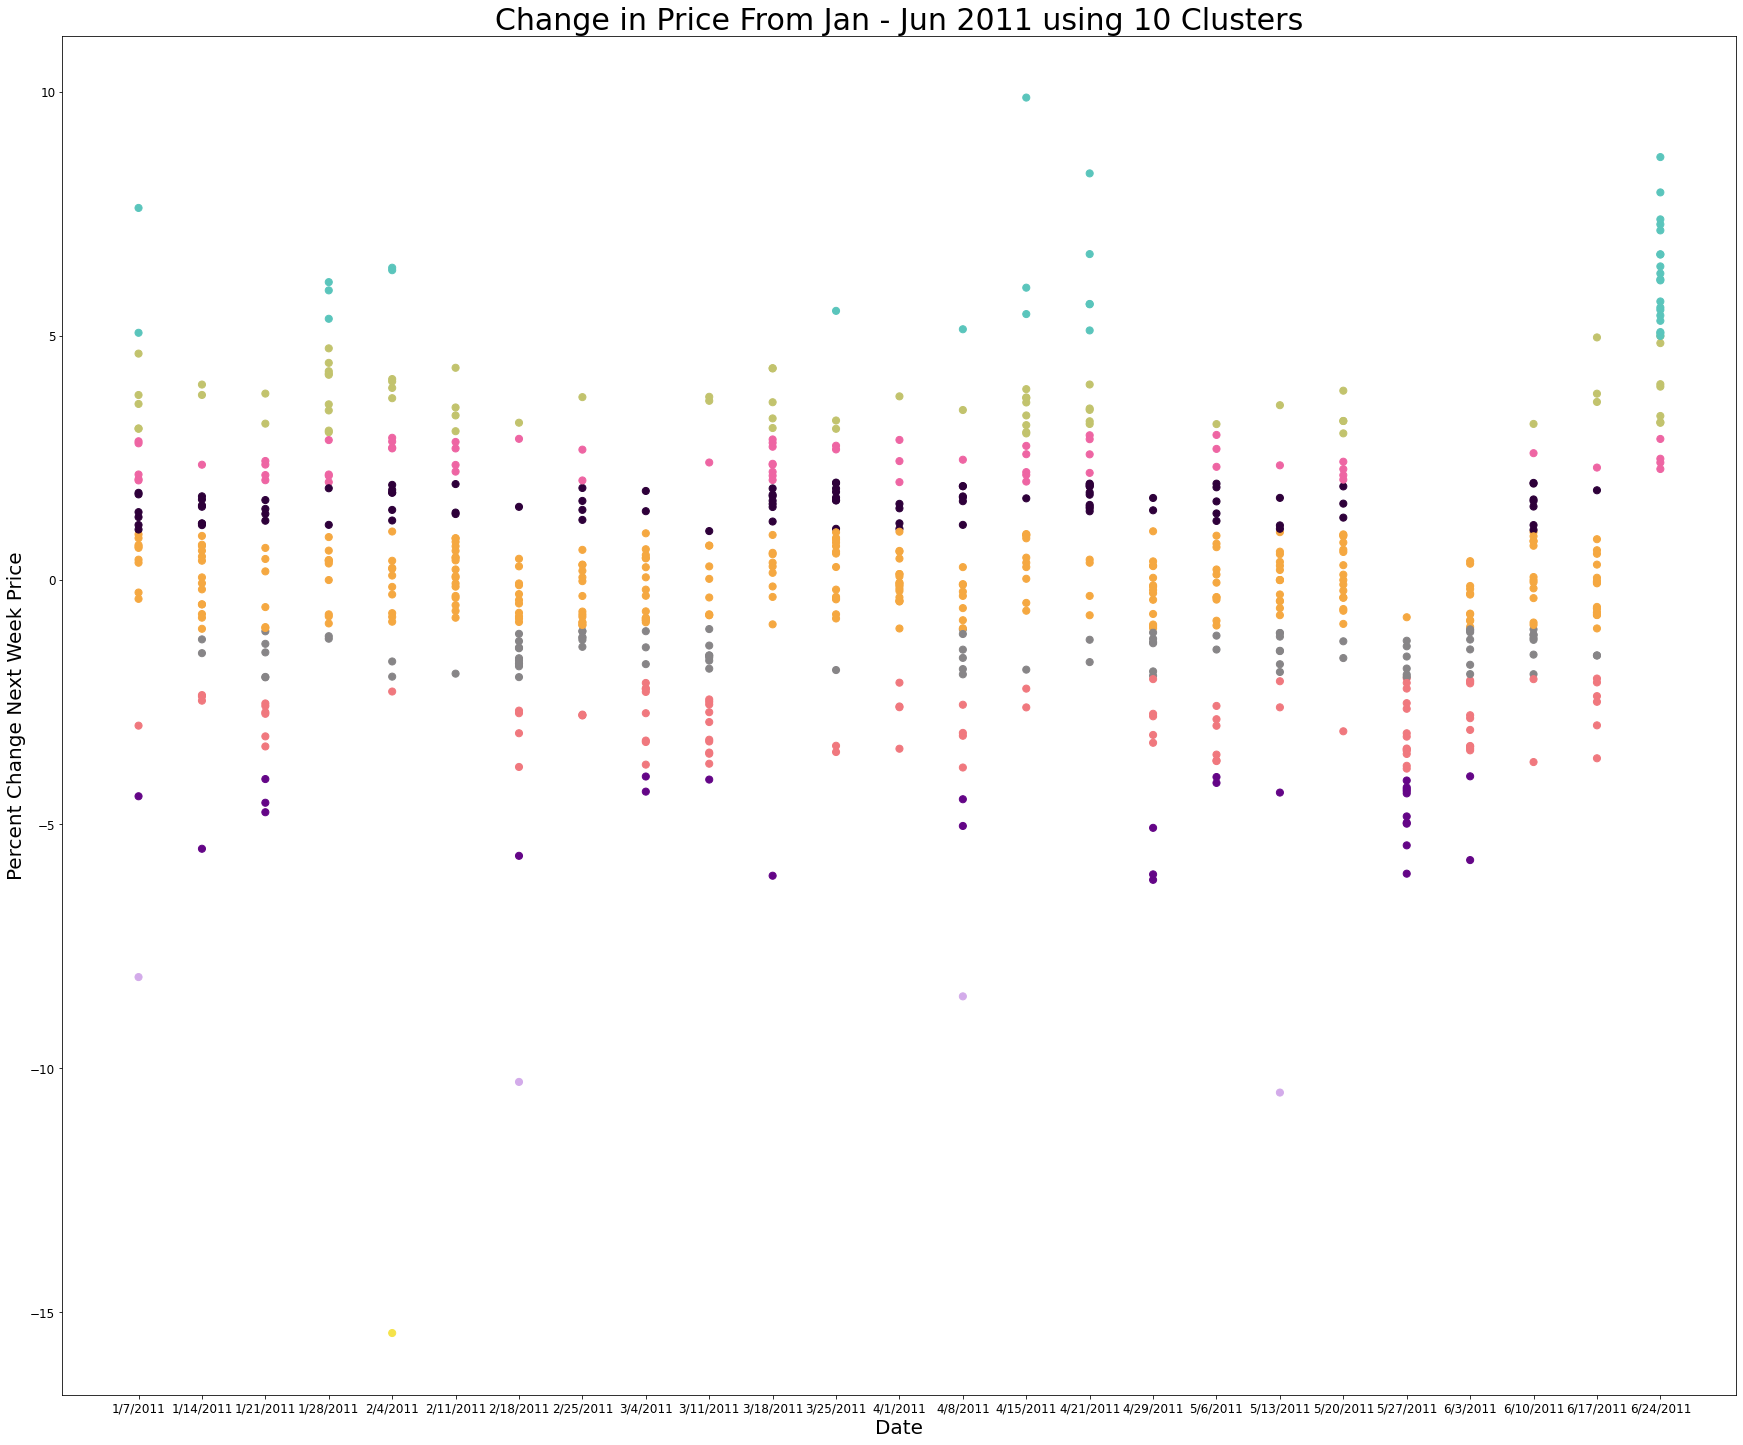

In [353]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 10 Clusters', fontsize=30)

In [121]:
print(kmeans.inertia_)

100.07826086956518


##### 15 Clusters

In [122]:
kmeans = KMeans(n_clusters=15)

In [123]:
kmeans.fit(x)

KMeans(n_clusters=15)

In [124]:
kmeans.labels_

array([ 7,  9,  6,  1,  0,  0,  5,  5,  2,  6, 13,  6, 13,  0,  7,  0, 14,
        5,  2,  0,  0,  0,  6,  0,  0,  6,  2,  3,  0,  0,  0,  0,  0,  9,
       13,  0, 10, 12,  7, 13,  6,  0,  5,  5,  6,  5, 12,  0,  0,  5,  3,
        3,  3,  8,  9,  0,  2,  8,  8,  3,  6,  9,  0,  1, 11,  0,  0,  5,
        9,  2,  0,  5,  8,  0,  0,  3,  0,  3,  8,  6,  7,  3,  8,  6,  3,
        9,  3, 13,  3,  8,  5,  0,  9,  0,  0,  6,  0,  6,  5, 13, 14,  0,
        0,  6,  5,  2,  3,  0,  6, 13,  6,  8,  8,  0,  0,  9,  0,  2,  0,
        8,  1,  6,  0,  0,  6,  8, 12,  0,  0,  9,  3,  0,  3,  8,  9, 13,
        6,  0,  4,  5,  9,  0,  6,  2,  8,  3,  8,  3,  0,  0,  0,  0,  0,
        2,  8,  6,  6,  0,  8,  0,  0,  8,  0,  0,  2,  2,  8,  2,  0,  0,
        7,  6,  0,  0,  5,  6,  9,  5,  0,  0,  3,  0,  5,  0, 13, 13,  5,
        9,  0,  0,  0,  0,  6,  0,  9,  8,  5,  0,  3,  0,  0,  5,  6,  0,
        0,  0,  5,  0,  6,  6,  6,  6,  0,  9,  3,  3,  0,  0,  5,  0,  8,
        0,  5,  8,  0,  7

In [125]:
kmeans.predict(x)

array([ 7,  9,  6,  1,  0,  0,  5,  5,  2,  6, 13,  6, 13,  0,  7,  0, 14,
        5,  2,  0,  0,  0,  6,  0,  0,  6,  2,  3,  0,  0,  0,  0,  0,  9,
       13,  0, 10, 12,  7, 13,  6,  0,  5,  5,  6,  5, 12,  0,  0,  5,  3,
        3,  3,  8,  9,  0,  2,  8,  8,  3,  6,  9,  0,  1, 11,  0,  0,  5,
        9,  2,  0,  5,  8,  0,  0,  3,  0,  3,  8,  6,  7,  3,  8,  6,  3,
        9,  3, 13,  3,  8,  5,  0,  9,  0,  0,  6,  0,  6,  5, 13, 14,  0,
        0,  6,  5,  2,  3,  0,  6, 13,  6,  8,  8,  0,  0,  9,  0,  2,  0,
        8,  1,  6,  0,  0,  6,  8, 12,  0,  0,  9,  3,  0,  3,  8,  9, 13,
        6,  0,  4,  5,  9,  0,  6,  2,  8,  3,  8,  3,  0,  0,  0,  0,  0,
        2,  8,  6,  6,  0,  8,  0,  0,  8,  0,  0,  2,  2,  8,  2,  0,  0,
        7,  6,  0,  0,  5,  6,  9,  5,  0,  0,  3,  0,  5,  0, 13, 13,  5,
        9,  0,  0,  0,  0,  6,  0,  9,  8,  5,  0,  3,  0,  0,  5,  6,  0,
        0,  0,  5,  0,  6,  6,  6,  6,  0,  9,  3,  3,  0,  0,  5,  0,  8,
        0,  5,  8,  0,  7

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 15 Clusters')

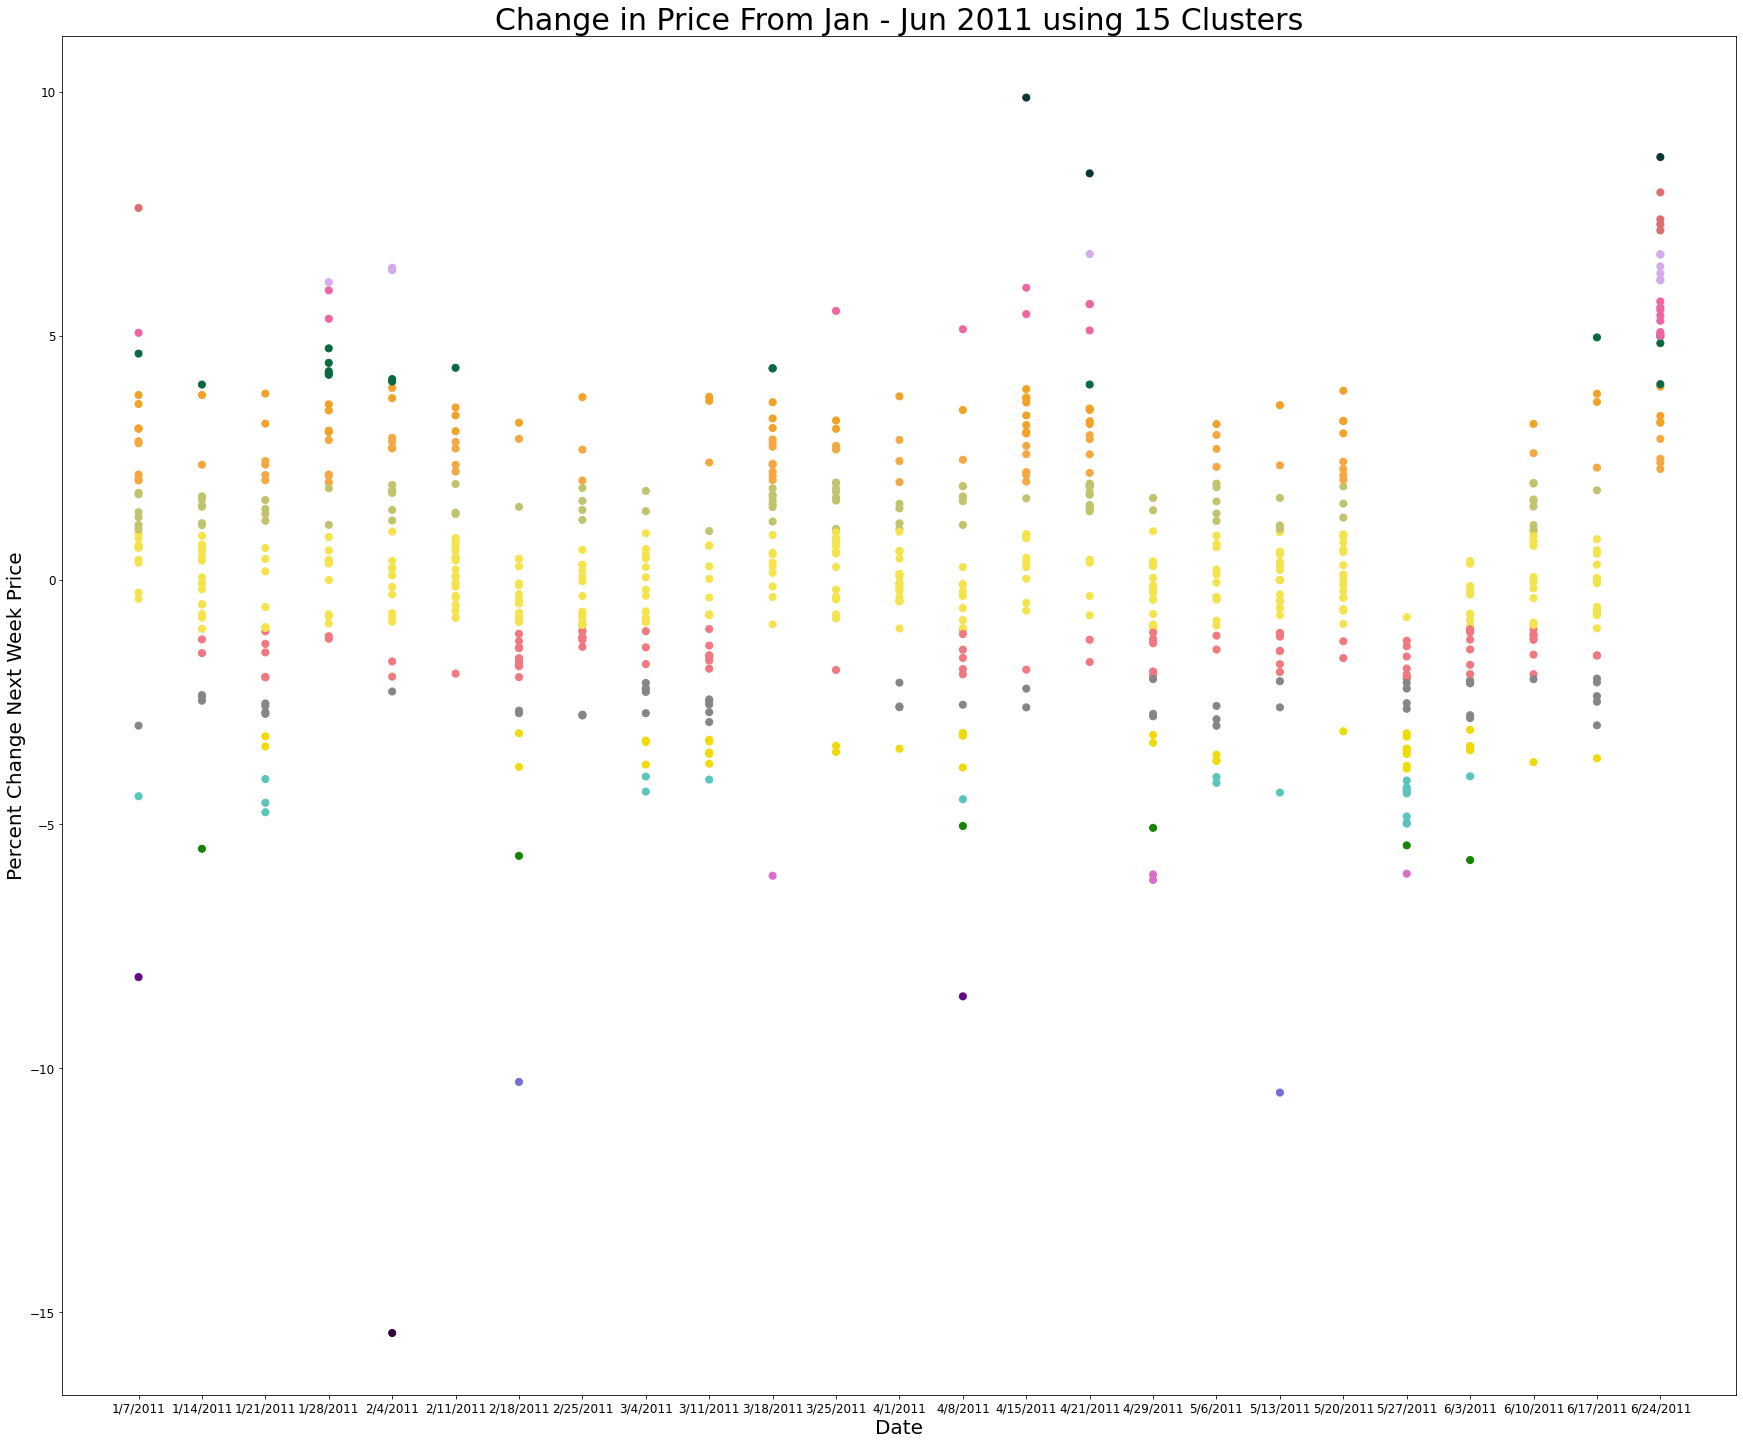

In [150]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 15 Clusters', fontsize=30)

In [130]:
print(kmeans.inertia_)

10.399999999999999


##### 18 Clusters

In [139]:
kmeans = KMeans(n_clusters=18)

In [140]:
kmeans.fit(x)

KMeans(n_clusters=18)

In [141]:
kmeans.labels_

array([ 2,  8,  6,  3,  4,  4,  0,  0, 11,  6, 13,  6, 13,  4,  2,  4,  9,
        0, 11,  4,  4,  4,  6,  4,  4,  6, 11, 10,  4,  4,  4,  4,  4,  8,
       13,  4, 16, 12,  2, 13,  6,  4,  0,  0,  6,  0, 17,  4,  4,  0, 10,
       10, 10,  1,  8,  4, 11,  1,  1, 10,  6,  8,  4,  3,  7,  4,  4,  0,
        8, 11,  4,  0,  1,  4,  4, 10,  4, 10,  1,  6,  2, 10,  1,  6, 10,
        8, 10, 13, 10,  1,  0,  4,  8,  4,  4,  6,  4,  6,  0, 13,  9,  4,
        4,  6,  0, 11, 10,  4,  6, 13,  6,  1,  1,  4,  4,  8,  4, 11,  4,
        1,  3,  6,  4,  4,  6,  1, 12,  4,  4,  8, 10,  4, 10,  1,  8, 13,
        6,  4, 15,  0,  8,  4,  6, 11,  1, 10,  1, 10,  4,  4,  4,  4,  4,
       11,  1,  6,  6,  4,  1,  4,  4,  1,  4,  4, 11, 11,  1, 11,  4,  4,
        2,  6,  4,  4,  0,  6,  8,  0,  4,  4, 10,  4,  0,  4, 13, 13,  0,
        8,  4,  4,  4,  4,  6,  4,  8,  1,  0,  4, 10,  4,  4,  0,  6,  4,
        4,  4,  0,  4,  6,  6,  6,  6,  4,  8, 10, 10,  4,  4,  0,  4,  1,
        4,  0,  1,  4,  2

In [142]:
kmeans.predict(x)

array([ 2,  8,  6,  3,  4,  4,  0,  0, 11,  6, 13,  6, 13,  4,  2,  4,  9,
        0, 11,  4,  4,  4,  6,  4,  4,  6, 11, 10,  4,  4,  4,  4,  4,  8,
       13,  4, 16, 12,  2, 13,  6,  4,  0,  0,  6,  0, 17,  4,  4,  0, 10,
       10, 10,  1,  8,  4, 11,  1,  1, 10,  6,  8,  4,  3,  7,  4,  4,  0,
        8, 11,  4,  0,  1,  4,  4, 10,  4, 10,  1,  6,  2, 10,  1,  6, 10,
        8, 10, 13, 10,  1,  0,  4,  8,  4,  4,  6,  4,  6,  0, 13,  9,  4,
        4,  6,  0, 11, 10,  4,  6, 13,  6,  1,  1,  4,  4,  8,  4, 11,  4,
        1,  3,  6,  4,  4,  6,  1, 12,  4,  4,  8, 10,  4, 10,  1,  8, 13,
        6,  4, 15,  0,  8,  4,  6, 11,  1, 10,  1, 10,  4,  4,  4,  4,  4,
       11,  1,  6,  6,  4,  1,  4,  4,  1,  4,  4, 11, 11,  1, 11,  4,  4,
        2,  6,  4,  4,  0,  6,  8,  0,  4,  4, 10,  4,  0,  4, 13, 13,  0,
        8,  4,  4,  4,  4,  6,  4,  8,  1,  0,  4, 10,  4,  4,  0,  6,  4,
        4,  4,  0,  4,  6,  6,  6,  6,  4,  8, 10, 10,  4,  4,  0,  4,  1,
        4,  0,  1,  4,  2

Text(0.5, 1.0, 'Change in Price From Jan - Jun 2011 using 18 Clusters')

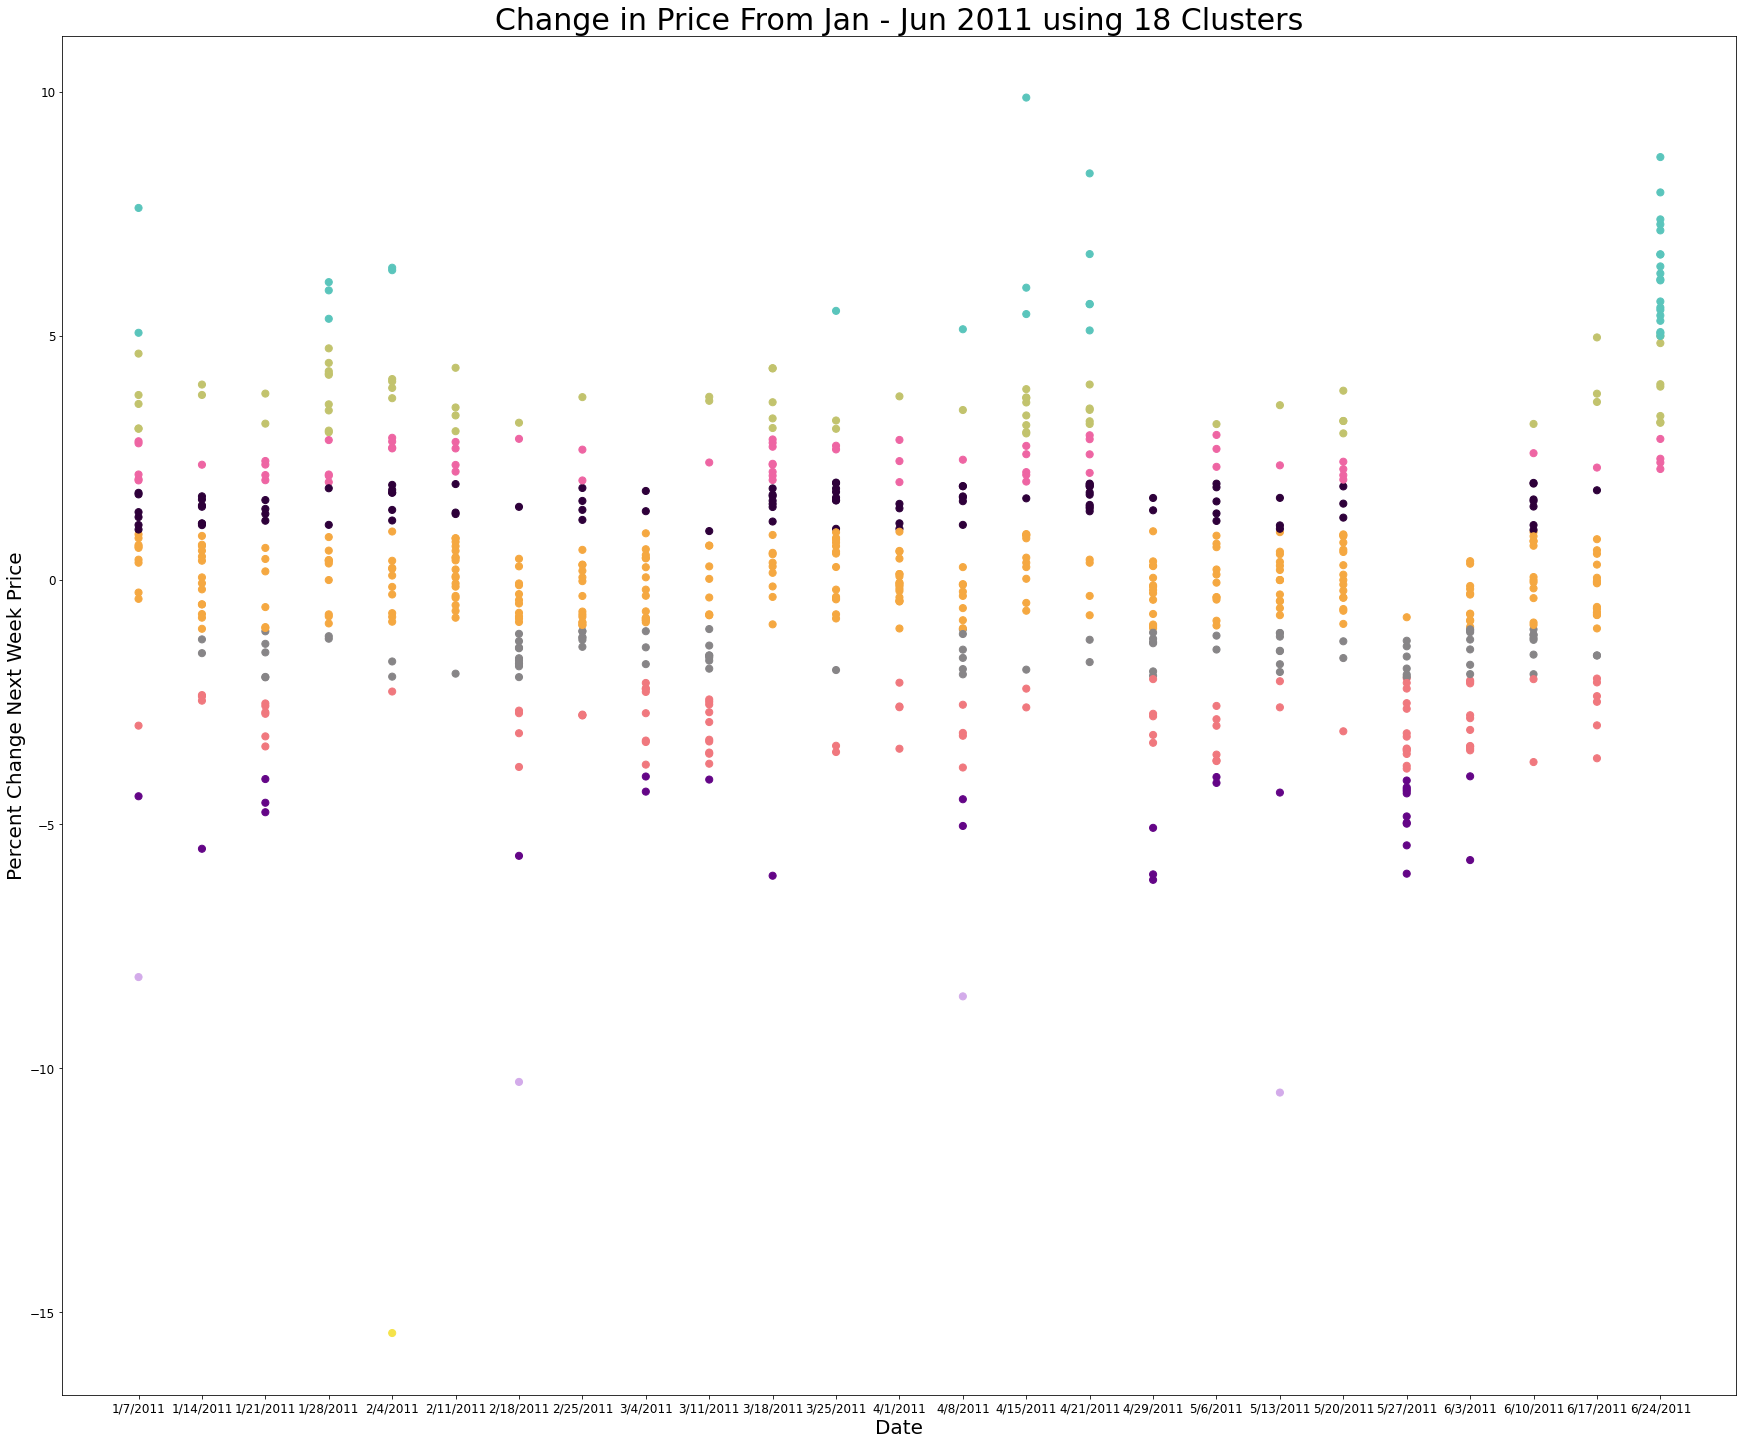

In [366]:
ax = df.plot.scatter(x='date', 
                y='percent_change_next_weeks_price', 
                color=[ourcolors[i] for i in kmeans.labels_], 
                title="Change in Price From Jan - Jun 2011",
                fontsize=12,
                s=50,
                figsize=(30,25)
               )
ax.set_xlabel('Date', fontsize=20)
ax.set_ylabel('Percent Change Next Week Price', fontsize=20)
ax.set_title('Change in Price From Jan - Jun 2011 using 18 Clusters', fontsize=30)

In [152]:
print(kmeans.inertia_)

0.6666666666666667


##### Concluding the Best Number of Clusters
The best number of clusters to use is 18 clusters as it produces the lowest inertia of 0.66. Each cluster represents the average percent change between this week and next week's price. To make predictions, the clustering algorithm will tell you which cluster of the 18 clusters that the new data point will belong to. 

### Findings Discussion

balhabalhahabalh 

## IV. Random Forest

### Literature Review

#### Citation 

Khaidem, L., Saha, S., & Dey, S. R. (2016). Predicting the direction of stock market prices using random forest. arXiv preprint arXiv:1605.00003.

#### Summary 

The paper, "Predicting the direction of stock market prices using random forest", uses an ensemble of random forests to determine the stock that will provide the most amount of return. Each forest is trained on a different feature subspace so each forest works with a different portion of the data, and will never see the entire data set. This reduces the variance that can come with only using one random forest, however, it slightly increases biases that may be in the data. The scientists extract  data from 6 features: the relative strength index, stochastic oscillator, williams %R, moving average convergence divergence, price rate of change, and on balance volume. They transform the raw data into numerical values while preserving the information in the original data set. Once this was completed, the trees were trained and tested. The split criteria in this paper is based on the Gini Coefficient, which measures the quality of the split, and the Shannon Entropy, the disorder of the information content. They test their data with different combinations of 30, 60 and 90 day trading periods and various number of trees ranging from 5 to 65. 

#### Key Findings

Accuracy was calculated dividing the total number true positive values and true negative values by the total number of true positive values, true negative values, false positive values and false negative values. In other words, they measure the portion of all testing samples classified correctly. Precision measured the proportion of samples tht were classified correctly as positive labels. They tested this algorithm with these parameters on the AAPL, GE dataset and Samsung. They found that the accuracy for 1 month, 2 months and 3 months has an accuracy of 86, 90 and 93 respectively. They found that the precision for 1 month, 2 months and 3 months was 88, 91 and 94. 

#### Limitations, Biases and Shortcomings

Random Forests have several hyperparameters such as the width and depth of trees. The width of trees were optimized with cross validation while the depth of trees were not. Since not all hyperparameters were considered, the modeling performed in the paper may therefore not be optimized. Furthermore, they drew conclusions after testing it against 3 different stocks over the span of three months. The sample size is too limited and they should be more explicit with the timeframe they used for the three months. It's possible that they selected a time frame when the stocks were already steadily increasing in price, and thus, it would be easier for the algorithm to make predictions when there are clear trends. Instead, the algorithm should be tested against a larger dataset over a longer period of time and against stocks across a wider variety of industries beyond technology. 

### Data Processing

The paper, "Predicting the direction of stock market prices using random forest", uses an ensemble of random forests to determine the stock that will provide the most amount of return. Each forest is trained on a different feature subspace so each forest works with a different portion of the data, and will never see the entire data set. Similarly, we will use the RandomForestRegressor to test and train the data using random forests and decision trees. 

In [390]:
import sklearn.datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import sklearn.tree

We need to convert the date into a numerical value in order to do regression. 

In [391]:
import datetime as dt
x_num = pd.to_datetime(x['date'], format="%m/%d/%Y")
x_num=x_num.map(dt.datetime.toordinal)
print (x_num)

0      734144
1      734151
2      734158
3      734165
4      734172
        ...  
745    734284
746    734291
747    734298
748    734305
749    734312
Name: date, Length: 750, dtype: int64


### Determining the Optimal Depth

Tree depth is one of the hyperparameters of the random tree regressor and thus needs to be tested and tuned before drawing the optimal conclusion. Tree depth refers to the number of decisions a single tree in the forest will make. We will calculate Mean Squared Error for each option in order to assess the optimal tree depth. The Mean Squared Error (MSE) measures the difference between actual and predicted values. The lower the Mean Squared Error, the better.  

#### 10 Max Depth

In [392]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=10)

In [393]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_num, y, test_size=0.5, random_state=42)

In [396]:
model.fit(x_train.values.reshape(-1, 1), y_train.values.ravel())

RandomForestRegressor(max_depth=10)

In [398]:
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [399]:
print('MSE_depth10 = ', mean_squared_error(y_test, y_pred))

MSE_depth10 =  4.453934128051638


In [400]:
model.estimators_

[DecisionTreeRegressor(max_depth=10, max_features='auto',
                       random_state=2010734365),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=166940305),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=442956140),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=124136798),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=698110723),
 DecisionTreeRegressor(max_depth=10, max_features='auto',
                       random_state=1725472667),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=705790769),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=406820859),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=654551143),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=546397246),
 DecisionTreeRegressor(max_depth=10, max_features='auto', random_state=549792815),
 DecisionTreeRegressor(max_depth=10, ma

In [450]:
model.estimators_[0].tree_.max_depth

9

[Text(1046.25, 415.1127272727273, 'date <= 734308.5\nmse = 8.068\nsamples = 227\nvalue = 0.16'),
 Text(919.4318181818181, 375.5781818181818, 'date <= 734280.5\nmse = 6.751\nsamples = 214\nvalue = -0.177'),
 Text(602.3863636363636, 336.0436363636364, 'date <= 734147.5\nmse = 6.539\nsamples = 180\nvalue = 0.15'),
 Text(475.5681818181818, 296.5090909090909, 'mse = 3.904\nsamples = 10\nvalue = 1.623'),
 Text(729.2045454545454, 296.5090909090909, 'date <= 734161.5\nmse = 6.56\nsamples = 170\nvalue = 0.054'),
 Text(475.5681818181818, 256.9745454545455, 'date <= 734154.5\nmse = 3.035\nsamples = 23\nvalue = -0.995'),
 Text(348.75, 217.44, 'mse = 1.802\nsamples = 13\nvalue = -0.19'),
 Text(602.3863636363636, 217.44, 'mse = 2.895\nsamples = 10\nvalue = -1.88'),
 Text(982.840909090909, 256.9745454545455, 'date <= 734168.5\nmse = 6.961\nsamples = 147\nvalue = 0.243'),
 Text(856.0227272727273, 217.44, 'mse = 4.774\nsamples = 11\nvalue = 1.895'),
 Text(1109.6590909090908, 217.44, 'date <= 734210.5\n

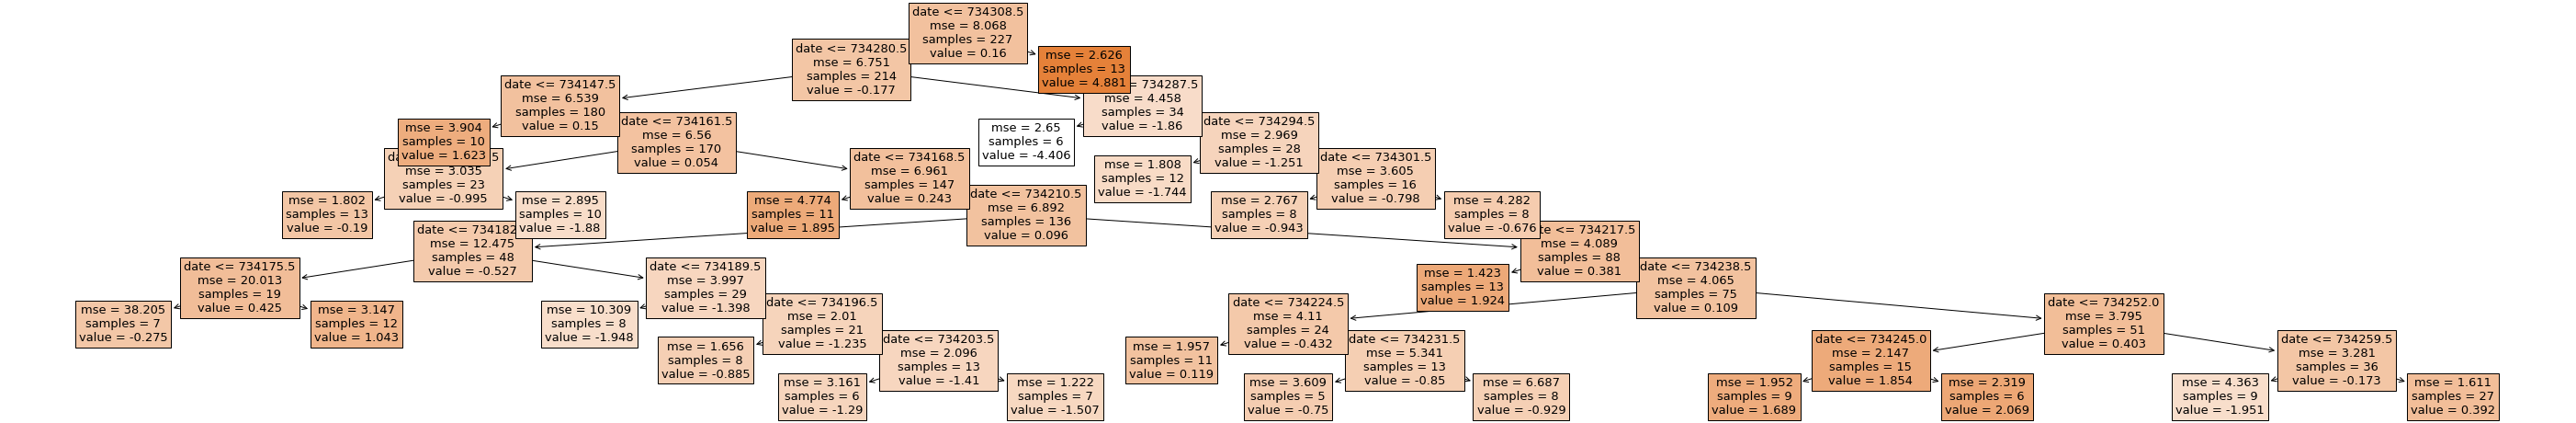

In [402]:
plt.figure(figsize=(50,8))
tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True, fontsize=13)

#### 3 Max Depth

The maximum depth was 10, however, the depth of the first tree is 5. Thus, we will try to select a max depth that is less than 5. 

In [403]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=3)

In [404]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_num, y, test_size=0.5, random_state=42)

In [405]:
model.fit(x_train.values.reshape(-1, 1), y_train.values.ravel())

RandomForestRegressor(max_depth=3)

In [406]:
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [407]:
print('MSE_depth3 = ', mean_squared_error(y_test, y_pred))

MSE_depth3 =  5.023829668108488


In [408]:
model.estimators_

[DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=965472556),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=378862519),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=91254200),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2086515184),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=680518196),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1684025225),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=389887303),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1205979661),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1760520229),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=298156740),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1522936794),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=240310681),
 DecisionTre

In [409]:
model.estimators_[0].tree_.max_depth

3

[Text(1046.25, 380.52, 'date <= 734308.5\nmse = 8.442\nsamples = 240\nvalue = 0.133'),
 Text(837.0, 271.8, 'date <= 734280.5\nmse = 7.287\nsamples = 227\nvalue = -0.16'),
 Text(418.5, 163.07999999999998, 'date <= 734273.5\nmse = 7.923\nsamples = 190\nvalue = -0.003'),
 Text(209.25, 54.360000000000014, 'mse = 8.125\nsamples = 182\nvalue = -0.1'),
 Text(627.75, 54.360000000000014, 'mse = 1.736\nsamples = 8\nvalue = 1.622'),
 Text(1255.5, 163.07999999999998, 'date <= 734287.5\nmse = 2.612\nsamples = 37\nvalue = -1.075'),
 Text(1046.25, 54.360000000000014, 'mse = 1.821\nsamples = 7\nvalue = -2.968'),
 Text(1464.75, 54.360000000000014, 'mse = 1.871\nsamples = 30\nvalue = -0.679'),
 Text(1255.5, 271.8, 'mse = 1.989\nsamples = 13\nvalue = 5.08')]

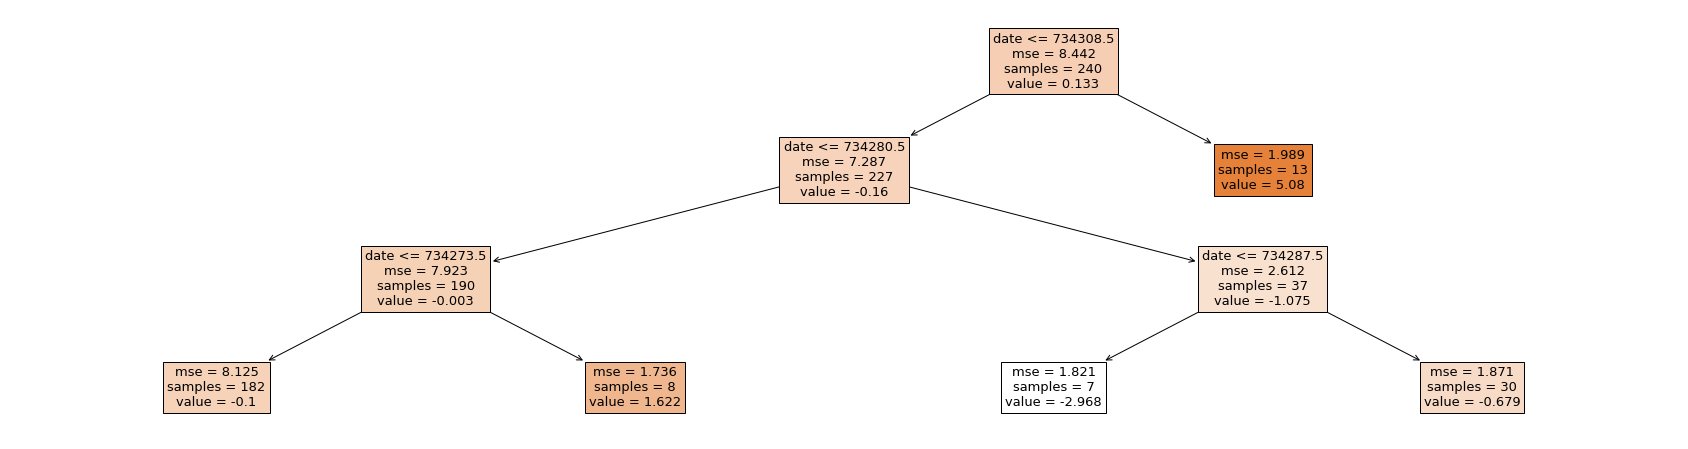

In [410]:
plt.figure(figsize=(30,8))
tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True, fontsize=13)

#### 7 Max Depth

Since a depth of 3 had a higher MSe than a depth of 10, I will try to use a depth that is in the middle of the two. 

In [431]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=7)

In [432]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_num, y, test_size=0.5, random_state=42)

In [433]:
model.fit(x_train.values.reshape(-1, 1), y_train.values.ravel())

RandomForestRegressor(max_depth=7)

In [434]:
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [467]:
print('MSE_depth7 = ', mean_squared_error(y_test, y_pred))

MSE_depth7 =  4.466010095900045


In [468]:
model.estimators_

[DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1533537119),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=826785691),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1038829012),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=673639366),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=845251086),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=280778499),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=345734067),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=223431075),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=826750707),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1909511453),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=737155594),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=971156726),
 DecisionTree

In [438]:
model.estimators_[0].tree_.max_depth

7

[Text(1484.28, 407.7, 'date <= 734308.5\nmse = 8.715\nsamples = 242\nvalue = 0.151'),
 Text(1395.0, 353.34000000000003, 'date <= 734280.5\nmse = 7.181\nsamples = 228\nvalue = -0.186'),
 Text(915.12, 298.98, 'date <= 734147.5\nmse = 7.061\nsamples = 190\nvalue = 0.142'),
 Text(825.84, 244.62, 'mse = 3.27\nsamples = 8\nvalue = 2.545'),
 Text(1004.4, 244.62, 'date <= 734210.5\nmse = 6.985\nsamples = 182\nvalue = 0.058'),
 Text(580.32, 190.26, 'date <= 734182.5\nmse = 8.312\nsamples = 85\nvalue = -0.466'),
 Text(357.12, 135.89999999999998, 'date <= 734161.5\nmse = 8.746\nsamples = 53\nvalue = -0.019'),
 Text(178.56, 81.54000000000002, 'date <= 734154.5\nmse = 5.082\nsamples = 22\nvalue = -1.169'),
 Text(89.28, 27.180000000000007, 'mse = 3.155\nsamples = 11\nvalue = -0.607'),
 Text(267.84000000000003, 27.180000000000007, 'mse = 6.168\nsamples = 11\nvalue = -1.619'),
 Text(535.6800000000001, 81.54000000000002, 'date <= 734175.5\nmse = 9.772\nsamples = 31\nvalue = 0.901'),
 Text(446.4, 27.180

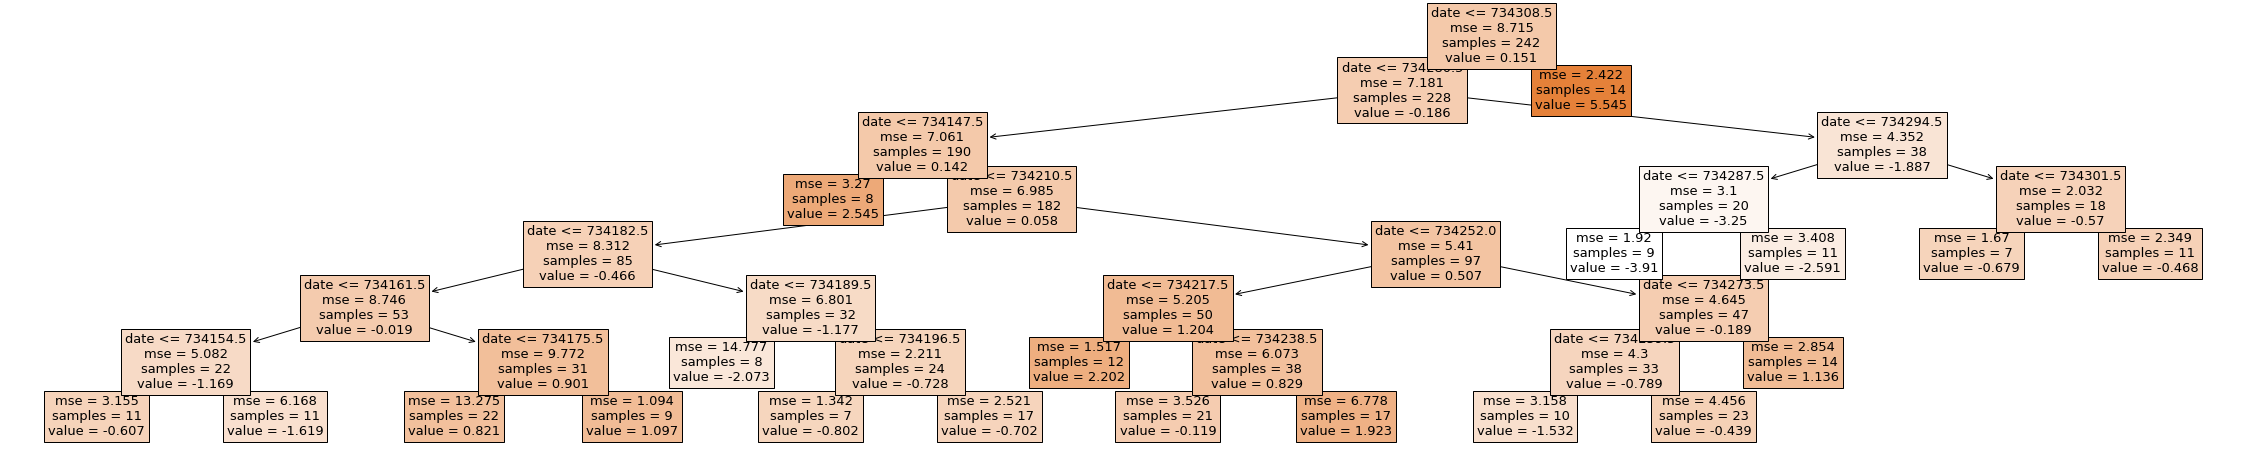

In [439]:
plt.figure(figsize=(40,8))
tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True, fontsize=13)

#### 15 Max Depth

It appears that the MSE decreases as we increase the depth. I will try using the max depth as 15. 

In [443]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=15)

In [444]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_num, y, test_size=0.5, random_state=42)

In [445]:
model.fit(x_train.values.reshape(-1, 1), y_train.values.ravel())

RandomForestRegressor(max_depth=15)

In [446]:
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [447]:
print('MSE_depth15 = ', mean_squared_error(y_test, y_pred))

MSE_depth15 =  4.470551469320892


In [448]:
model.estimators_

[DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=1106009701),
 DecisionTreeRegressor(max_depth=15, max_features='auto', random_state=429139346),
 DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=2119323165),
 DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=1376670958),
 DecisionTreeRegressor(max_depth=15, max_features='auto', random_state=498804498),
 DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=1065608497),
 DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=1436887475),
 DecisionTreeRegressor(max_depth=15, max_features='auto', random_state=521073914),
 DecisionTreeRegressor(max_depth=15, max_features='auto', random_state=265493190),
 DecisionTreeRegressor(max_depth=15, max_features='auto',
                       random_state=1776891634),
 DecisionTreeRegressor(max

In [449]:
model.estimators_[0].tree_.max_depth

9

I notice that the max tree depth when there is 15 is still 9 just as it was when there only 10 as the max depth. I want to try to use 9 as the max depth to see if that will decrease the MSE.

#### 9 Max Depth

In [453]:
model = sklearn.ensemble.RandomForestRegressor(max_depth=9)

In [454]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x_num, y, test_size=0.5, random_state=42)

In [455]:
model.fit(x_train.values.reshape(-1, 1), y_train.values.ravel())

RandomForestRegressor(max_depth=9)

In [456]:
y_pred = model.predict(x_test.values.reshape(-1, 1))

In [457]:
print('MSE_depth9 = ', mean_squared_error(y_test, y_pred))

MSE_depth9 =  4.466010095900045


In [458]:
model.estimators_

[DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1533537119),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=826785691),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1038829012),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=673639366),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=845251086),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=280778499),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=345734067),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=223431075),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=826750707),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=1909511453),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=737155594),
 DecisionTreeRegressor(max_depth=9, max_features='auto', random_state=971156726),
 DecisionTree

[Text(1945.657894736842, 413.13599999999997, 'date <= 734308.5\nmse = 9.662\nsamples = 238\nvalue = 0.123'),
 Text(1847.7631578947369, 369.648, 'date <= 734280.5\nmse = 8.696\nsamples = 228\nvalue = -0.095'),
 Text(1297.1052631578948, 326.15999999999997, 'date <= 734210.5\nmse = 9.741\nsamples = 190\nvalue = 0.132'),
 Text(783.1578947368421, 282.672, 'date <= 734182.5\nmse = 13.421\nsamples = 96\nvalue = -0.377'),
 Text(587.3684210526316, 239.184, 'date <= 734175.5\nmse = 17.737\nsamples = 61\nvalue = 0.062'),
 Text(489.4736842105263, 195.696, 'date <= 734168.5\nmse = 21.692\nsamples = 51\nvalue = -0.332'),
 Text(391.57894736842104, 152.20799999999997, 'date <= 734161.5\nmse = 6.136\nsamples = 40\nvalue = 0.334'),
 Text(293.6842105263158, 108.72000000000003, 'date <= 734154.5\nmse = 6.778\nsamples = 27\nvalue = -0.009'),
 Text(195.78947368421052, 65.23199999999997, 'date <= 734147.5\nmse = 6.857\nsamples = 20\nvalue = 0.543'),
 Text(97.89473684210526, 21.744000000000028, 'mse = 14.106\

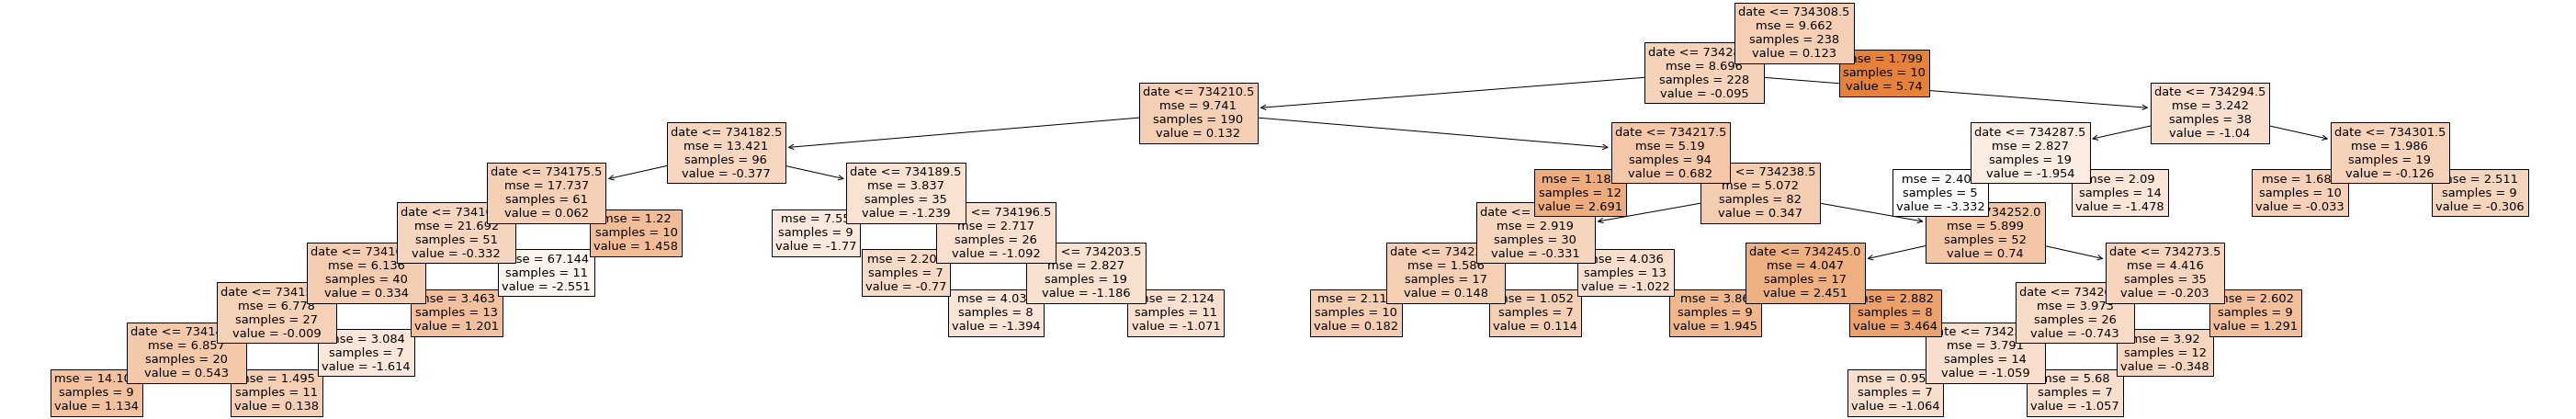

In [460]:
plt.figure(figsize=(50,8))
tree.plot_tree(model.estimators_[0], feature_names=x.columns, filled=True, fontsize=13)

##### Concluding the Best Max Depth

The best Max Depth is 10 as it produced the lowest MSE. Something that I thought was interesting was how the MSE was still slightly different between the max depth of 9 and max depth of 10. I thought that the max depth of 9 would look identical to the max depth tree of 10 since they both had a depth of 9 for their first index. But the trees also looked quite different from one another in terms of the shading and decisions that are being made. I think this could possibly be attributed to other indexes potentially having a depth of 10. 

### Findings Discussion

## V. Linear Regression

### Literature Review

#### Citation 

Timmerman, N. (2021). An Assessment of Stock Return Prediction using Machine Learning. Tilburg School of Economics and Management.

#### Summary 

In this paper, they predict stock market returns in the Dow Jones Index with a variety of algorithms, one of which is linear regression. Specifically, they measure the factor of the amount of returns in this time period compared to the previous period using linear regression. They use two different time periods: T1 is the time period from 10-10-2013 to 31-5-2014 excluding holidays and weekends and T2 is the time period from 29-12-2017 to 31-10-2020. Furthermore, they tested on Apple, Facebook, Amazon, Starbucks, Salesforce, Intel, Tesla, Asml, Sony, Walmart and American Airline stocks during these two time periods. 

#### Key Findings

The graphs showed that there was a large difference between the predicted return value and the actual value for Amazon stocks compared to Apple stocks. Their trained linear regression model lead to a 65% difference between the predicted return value and the actual value for Amazon stocks compared to Apple stocks. They concluded that the predictions were very inaccurate, mainly due to the linearity of the model and the expectation that the data in the model won’t be linear. Overall, the model correctly predicted the trend of the stock price 50% of the time. 

#### Limitations, Biases and Shortcomings

They used two different testing periods to draw conclusions on the accuracy of the model. However, the two time periods are very different from one another. T1 is only half a year long while T2 spans 3 years. Furthemore, stocks during T2 must be extremely hard to predict as this was when COVID-19 first hit. I believe that the algorithm didn't train and test on enough data before ruling out the accuracy of Linear Regression. They should have trained and tested on periods that were equal in length of time and should have trained and tested on periods that varied in econonmic conditions. The Dow Jones Index contains over 30 stocks, however, Timmerman only used 11 stocks. A small sample size with companies from similar food and technology industries might cause the model to suffer from underfitting. This model might not be completely generalizable across predicting stocks across the industry as there could be unseen data. The predictions made here should not be assumed to be similar to predicting the DJIA

The data also does not consider margin calls or investment fees - considerations other than the stock index that all stakeholders will make prior to investing. The model may not be suitable in a realistic investment environment and it needs to  consider the stakeholder's financial situation: the amount they are willing to invest, the amount of fees they are able to incur, the amount of risk they can take and the length of time they need to gain returns. 

### Data Processing

In [501]:
import sklearn.linear_model
# Select a linear regression model
model = sklearn.linear_model.LinearRegression()
import sklearn.model_selection

In [502]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
    x_num, y, test_size=0.5, random_state=42)

In [503]:
x_test = x_test.values.reshape(-1,1)
x_train = x_train.values.reshape(-1,1)

In [504]:
model.fit(x_train, y_train)

LinearRegression()

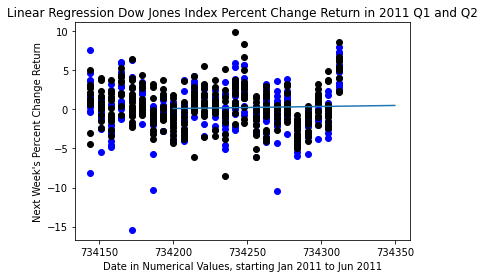

In [538]:
# Visualize what the predictions are for this model

plt.plot(x_train,y_train,'bo')
plt.plot(x_test,y_test,'ko')

x_new = np.linspace(734200, 734350)
x_new = x_new.reshape(-1,1)

# the predicted y values are now from a model equation, 
# not from results of calling the predict function
y_pred = model.intercept_ + model.coef_ * x_new

# assign labels
plt.title("Linear Regression Dow Jones Index Percent Change Return in 2011 Q1 and Q2")
plt.xlabel("Date in Numerical Values, starting Jan 2011 to Jun 2011")
plt.ylabel("Next Week's Percent Change Return")

plt.plot(x_new, y_pred)
plt.show()


##### Concluding the Accuracy of the Linear Regression

In [542]:
from sklearn.metrics import mean_squared_error, r2_score

print('MSE = ', mean_squared_error(y_test, model.predict(x_test)))
print('R^2 = ', r2_score(y_test, model.predict(x_test)))

MSE =  6.6129803038781585
R^2 =  -0.012515494497054691


The mean squared error is around 6 while the R^2 value is -0.0125. The error is quite low and this could be attributed to the linear regression under fitting the data since there is so much variation in the data. 

### Findings Discussion

The R^2 value is negative indicates that a horizontal line is a better fit our test data than the model we trained, essentially saying that the linear regression model is not helpful in making predictions. In our model and the model used in the paper, both linear regression models, even on different sets of data, showed that they weren't accurate predictors of stock performance from one week to another. 

## VI. Conclusion